# Global Soil Moisture Analysis: Monthly Climatologies

----------------------------------------
DTR

# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import xarray as xr
import rioxarray

In [5]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
from tqdm import tqdm

In [7]:
import scienceplots

In [37]:
import calendar

In [8]:
import os

In [9]:
#Python 3.4+:
os.cpu_count()

80

# Directory Management

In [10]:
os.getcwd()

'/media/donald/disk4nvme/ANALYSIS_GEOSPATIAL'

# Data Directory

In [11]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_ANALYSIS/'

In [12]:
#os.listdir(dir_data)

In [13]:
FILES_LIST = [f for f in os.listdir(dir_data) if f.endswith('.grib')]
FILES_LIST

['ERA5_LAND_VOLSM_Level1_2005_2020_MONTHLY_GLOBAL.grib',
 'ERA5_LAND_GLOBAL_VOLSM_L1_1985_2020_MONTHLY.grib']

We will use the longer time-series data: 1985 -2020

In [15]:
FILES_LIST[1]

'ERA5_LAND_GLOBAL_VOLSM_L1_1985_2020_MONTHLY.grib'

# File size check

In [16]:
def convert_bytes(byt_num):
    """
    this function will convert bytes to KB, MB, GB and TB
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if byt_num < 1024.0:
            return "%3.1f %s" % (byt_num, x)
        byt_num /= 1024.0
    return byt_num
        

In [17]:
def check_filesize(file_path):
    """
    function to check the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [18]:
os.path.join(dir_data, FILES_LIST[0] )

'/media/donald/disk10/DATA_GEOSPATIAL_ANALYSIS/ERA5_LAND_VOLSM_Level1_2005_2020_MONTHLY_GLOBAL.grib'

In [19]:
# Size of the file
check_filesize(os.path.join(dir_data, FILES_LIST[1] ))

'2.1 GB'

#  Read the Data

In [21]:
fname = os.path.join(dir_data,FILES_LIST[1] )
fname

'/media/donald/disk10/DATA_GEOSPATIAL_ANALYSIS/ERA5_LAND_GLOBAL_VOLSM_L1_1985_2020_MONTHLY.grib'

grib files can be read using:

    - xarray with the cfgrib engine
    - xarray with the pynio engine
    - pygrib

In [22]:
# check the available engines
xr.backends.list_engines()

{'netcdf4': <NetCDF4BackendEntrypoint>
   Open netCDF (.nc, .nc4 and .cdf) and most HDF5 files using netCDF4 in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.NetCDF4BackendEntrypoint.html,
 'scipy': <ScipyBackendEntrypoint>
   Open netCDF files (.nc, .nc4, .cdf and .gz) using scipy in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.ScipyBackendEntrypoint.html,
 'cfgrib': <CfGribBackend>
   Open GRIB files (.grib, .grib2, .grb and .grb2) in Xarray
   Learn more at https://github.com/ecmwf/cfgrib,
 'rasterio': <RasterioBackend>,
 'store': <StoreBackendEntrypoint>
   Open AbstractDataStore instances in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.StoreBackendEntrypoint.html,
 'zarr': <ZarrBackendEntrypoint>
   Open zarr files (.zarr) using zarr in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.ZarrBackendEntrypoint.html}

ds_L1_SM = xr.open_dataset(fname, engine="cfgrib", decode_coords="all",
                           chunks= {'latitude': 'auto', 'longitude': 'auto' })

In [23]:
# read data
ds_L1_SM = xr.open_dataset(fname, engine="cfgrib", decode_coords="all" )

In [24]:
ds_L1_SM

<xarray.Dataset>
Dimensions:              (time: 432, latitude: 1801, longitude: 3600)
Coordinates:
    number               int64 ...
  * time                 (time) datetime64[ns] 1985-01-01 ... 2020-12-01
    step                 timedelta64[ns] ...
    depthBelowLandLayer  float64 ...
  * latitude             (latitude) float64 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude            (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
    valid_time           (time) datetime64[ns] ...
Data variables:
    swvl1                (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-01-02T00:04 GRIB to CDM+CF via cfgrib-0.9.1...

## time period covered

In [25]:
ds_L1_SM.time.values[::12]

array(['1985-01-01T00:00:00.000000000', '1986-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '1988-01-01T00:00:00.000000000',
       '1989-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1991-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01

## Quick plot

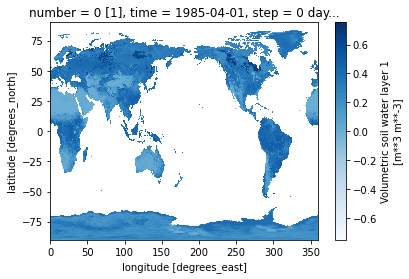

In [26]:
ds_L1_SM['swvl1'].isel(time=3).plot( cmap=plt.get_cmap('Blues') )
plt.show()

## Re-centre

As we can see the centre is not a zero degrees because the longitude coordinates are not running -180 to + 180 degrees. We need to modify this

In [27]:
ds_L1_SM.coords['longitude'] = (ds_L1_SM.coords['longitude'] + 180) % 360 - 180
#and sort
ds_L1_SM = ds_L1_SM.sortby(ds_L1_SM.longitude)
#ds_L1_SM

In [28]:
# check
ds_L1_SM.longitude.values.min(), ds_L1_SM.longitude.values.max()

(-179.90000000000595, 179.9999999999941)

### Quick plot

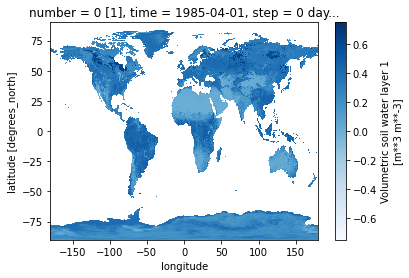

In [29]:
ds_L1_SM['swvl1'].isel(time=3).plot( cmap=plt.get_cmap('Blues') )

Now centred at 0 degrees

# Years in dataset

In [44]:
np.unique( ds_L1_SM['swvl1'].time.dt.year.values )

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020])

# Calculate Monthly Means

In [30]:
# compute monthly mean values
ds_LT_MonMeans = ds_L1_SM['swvl1'].groupby("time.month").mean("time")

In [31]:
#ds_LT_MonMeans

# Plot Climatologies using Facet Grid method

<Figure size 1008x864 with 0 Axes>

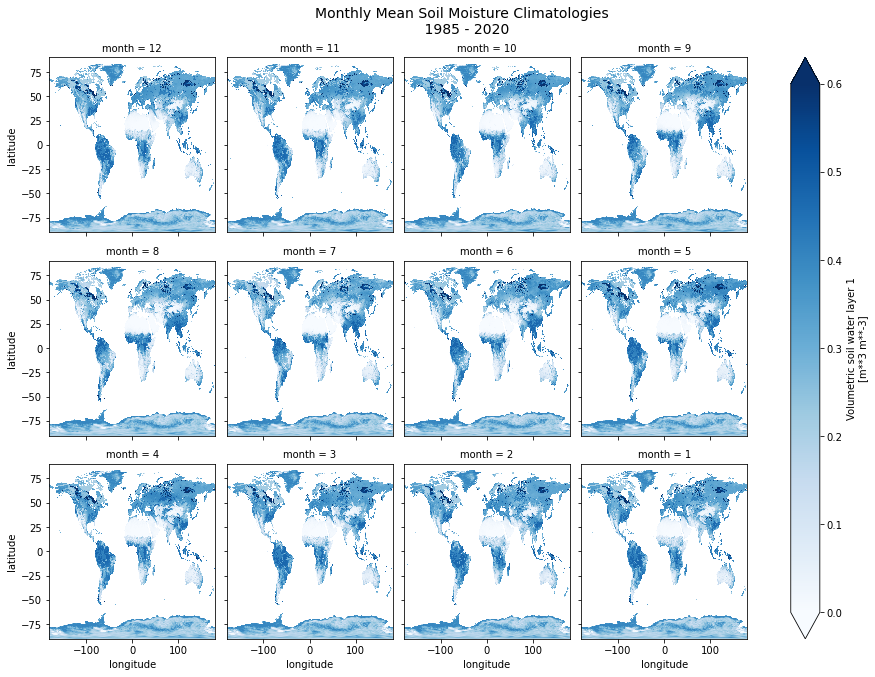

In [50]:
plt.figure( figsize=(14,12) )
ds_LT_MonMeans.sel(month=list(range(12, 0, -1))).plot(col="month", col_wrap=4, 
                                                      vmin=0, vmax=0.6,
                                                      cmap = plt.get_cmap('Blues') )

plt.suptitle('Monthly Mean Soil Moisture Climatologies \n 1985 - 2020',
             fontsize=14,
             y=1.04)

plt.show()

# Alternative approach

In [33]:
# get month values. Will be used to index
ds_L1_SM.time.dt.month.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10

In [35]:
# Example
#ds_L1_SM.time.dt.month.values == 1

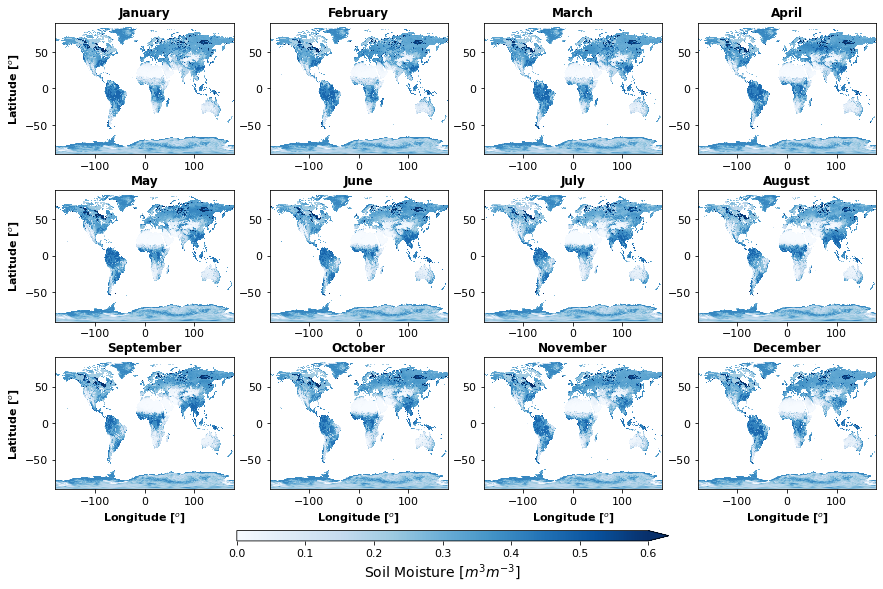

In [38]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) 
# wspace and hspace adjust the horizontal and vertical spaces, respectively.

nrows = 3
ncols = 4
for idx in range(1, 13):
    
    # Identify the months matching idx
    idx_select = ds_L1_SM.time.dt.month.values == idx
    ## subset using index
    ds_mean_L1 = ds_L1_SM['swvl1'][idx_select, :,:].mean("time")
    ## Get month name
    month_name = calendar.month_name[idx]
    
    #####################################################################
    ## add subplot
    plt.subplot(nrows, ncols, idx)
    
    p = plt.pcolormesh(ds_mean_L1.longitude, ds_mean_L1.latitude, ds_mean_L1.data,
                       vmin = 0, vmax = 0.6,  cmap = 'Blues' )
    
    
    plt.title(month_name, fontsize = 12, 
              fontweight = 'bold', color = 'black')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    ## add y-axis labels
    if idx % ncols == 1: 
        plt.ylabel('Latitude [$^o$]', fontsize = 11, fontweight = 'bold')
    if idx > ncols*(nrows-1): 
        plt.xlabel('Longitude [$^o$]', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Soil Moisture [$m^3 m^{-3}$]', color = 'k', size=14)

#  Plot using scienceplots

Using scienceplots for that extra-quality touch. With scienceplots you can select a number of publication standards. We will choose the nature paper standard

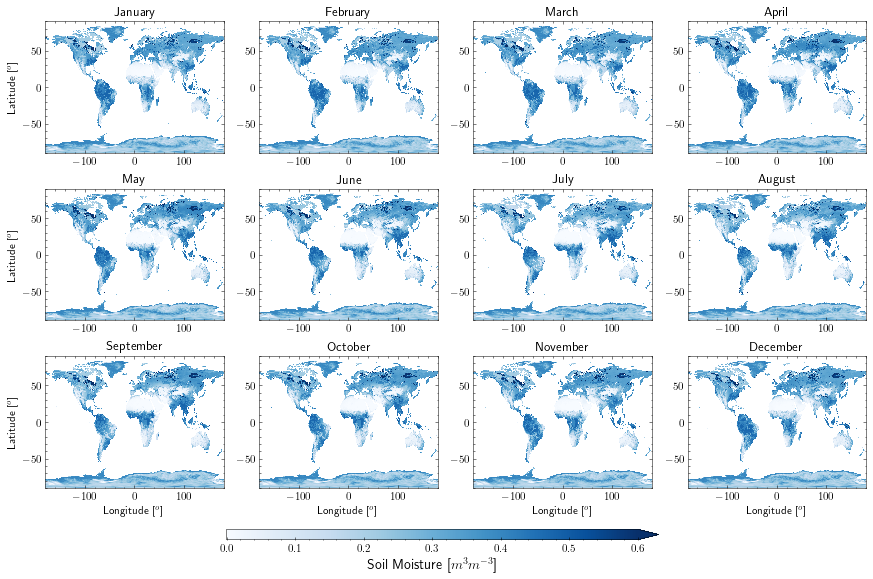

In [39]:
#trigger scienceplots
with plt.style.context(['science', 'nature']):
    # plot
    fig = plt.figure(figsize=[12,8], facecolor='w')
    plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                        wspace=0.2, hspace=0.27) 
    # wspace and hspace adjust the horizontal and vertical spaces, respectively.

    nrows = 3
    ncols = 4
    for idx in range(1, 13):

        idx_select = ds_L1_SM.time.dt.month.values == idx

        ds_mean_L1 = ds_L1_SM['swvl1'][idx_select, :,:].mean("time")

        ## Get month name

        month_name = calendar.month_name[idx]

        #####################################################################
        ## add subplot
        plt.subplot(nrows, ncols, idx)

        p = plt.pcolormesh(ds_mean_L1.longitude, ds_mean_L1.latitude, ds_mean_L1.data,
                           vmin = 0, vmax = 0.6,  cmap = 'Blues' )


        plt.title(month_name, fontsize = 13, 
                  fontweight = 'bold', color = 'black')
        plt.xticks(fontsize = 11)
        plt.yticks(fontsize = 11)
        ## add y-axis labels
        if idx % ncols == 1: 
            plt.ylabel('Latitude [$^o$]', fontsize = 11, fontweight = 'bold')
        if idx > ncols*(nrows-1): 
            plt.xlabel('Longitude [$^o$]', fontsize = 11, fontweight = 'bold')

    # Add a colorbar at the bottom:
    cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
    cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
    cb.ax.tick_params(labelsize=11)
    cb.set_label(label='Soil Moisture [$m^3 m^{-3}$]', color = 'k', size=14)
    